## Plots for loop tests for which all subcats have the same number of a single LID

In [2]:
# ONLY for loop tests for which all subcats have the same number of a single LID:
%matplotlib inline
from pymongo import MongoClient
from datetime import datetime
import matplotlib.pyplot as plt
def volume_reduction_and_runoff_volume_vs_lid_number(collectionName):
    mGal = 133680.5  # 1 Million gallon in cubic feet
    runs = db[collectionName]
    cursor = runs.find()
    numList = []
    volReductionList = []
    totalSurfaceOutflowList = []
    noLidRun = cursor[0]
    noLidVolume = noLidRun['volume']
    for run in cursor:
        runParamsZero = run['runParamList'][0] 
        number = runParamsZero['Number']
        numList.append(number)
        volume = run['volume']
        volReduction = noLidVolume-volume
        volReductionList.append(volReduction)
        if run['lidDict'] == None:
            totalSurfaceOutflowList.append(None)
            continue
        else:
            totalSurfaceOutflow = 0.0
            runParamList = run['runParamList']
            lidDict = run['lidDict']
            for lidUsage in runParamList:
                lid = lidUsage['LID']
                subcat = lidUsage['Subcat']
                lidNumber = lidUsage['Number']
                #print lidNumber,
                lidArea = lidUsage['Area']  # in square feet
                lidKey = subcat+' '+lid
                surfaceOutflowInches = lidDict[lidKey]['Surface Outflow']
                surfaceOutflow = surfaceOutflowInches*lidNumber*lidArea/12.0  # cubic feet
                totalSurfaceOutflow += surfaceOutflow/mGal  # convert to million Gal/year
            #print totalSurfaceOutflow
            totalSurfaceOutflowList.append(totalSurfaceOutflow)
    return(numList,volReductionList,totalSurfaceOutflowList)

### Show the collections that have been generated

In [3]:
#client = MongoClient('mongodb://server.mcgarity.info:27017')
client = MongoClient()
db = client["swmm_wingo"]
collectionNames = sorted(db.collection_names())
collectionNames

[u'y16m01d28_loop_run_1']

### Loop Test 4: Example2 - Increasing number of Wakefield Raingardens in S1 Only

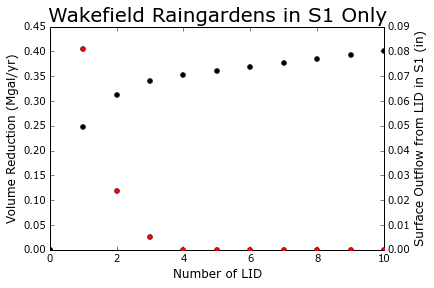

In [3]:
collectionName = 'y16m01d28_loop_run_1'
(numList,volReductionList,totalSurfaceOutflowList) = volume_reduction_and_runoff_volume_vs_lid_number(collectionName)
(fig, ax1) = plt.subplots()
ax1.plot(numList,volReductionList,'ko',markersize = 5)
ax1.set_xlabel("Number of LID",fontsize=12)
ax1.set_ylabel("Volume Reduction (Mgal/yr)",fontsize=12)
ax2 = ax1.twinx()
ax2.plot(numList,totalSurfaceOutflowList,'ro',markersize = 5)
ax2.set_ylabel("Surface Outflow from LID in S1 (in)",fontsize=12)
plt.title('Wakefield Raingardens in S1 Only',fontsize=20)

### Loop Test 6: Example2 - Increasing numbers of Wakefield Raingardens in S1 - S6

In [4]:
collectionName = 'y16m01d28_loop_run_1'
(numList,volReductionList,totalSurfaceOutflowList) = volume_reduction_and_runoff_volume_vs_lid_number(collectionName)
(fig, ax1) = plt.subplots()
ax1.plot(numList,volReductionList,'ko',markersize = 5)
ax1.set_xlabel("Number of LID",fontsize=12)
ax1.set_ylabel("Volume Reduction (Mgal/yr)",fontsize=12)
ax2 = ax1.twinx()
ax2.plot(numList,totalSurfaceOutflowList,'ro',markersize = 5)
ax2.set_ylabel("Surface Outflow from all LID (Mgal/yr)",fontsize=12)
plt.title('Total Lid in Wingohocking',fontsize=20)


KeyError: u'S3 wakefield_BR_RG'